In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
data = np.genfromtxt(fname='amt-dsox-longterm.csv', usecols=range(1, 18), delimiter=",", names=True)
data = data[200:]
data_x = np.linspace(0, np.shape(data)[0], np.shape(data)[0])
print("Samples: {}".format(np.shape(data)[0]))
mean_acc = np.array([np.mean(data["ax"]), np.mean(data["ay"]), np.mean(data["az"])]).round(4)
mean_gyr = np.array([np.mean(data["gx"]), np.mean(data["gy"]), np.mean(data["gz"])]).round(4)
mean_or = np.array([np.mean(data["pitch"]), np.mean(data["roll"]), np.mean(data["heading"])]).round(4)

Samples: 4410


# Accelerometer

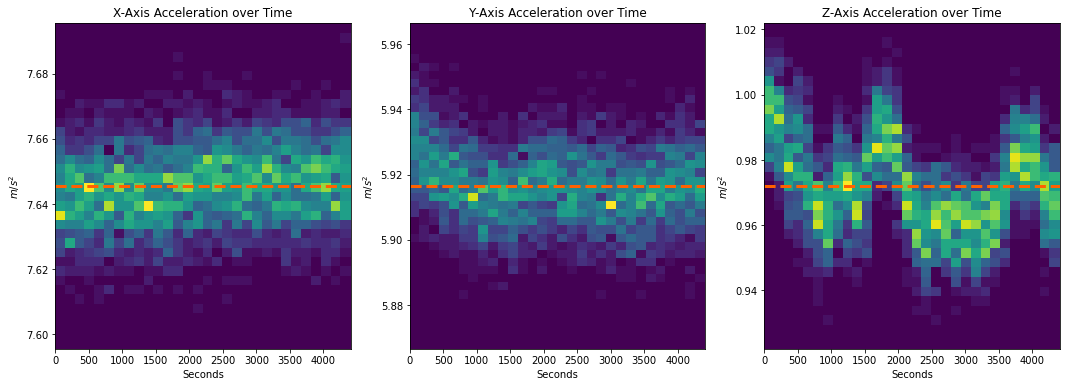

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), tight_layout=False)
dy = 0.05

axs[0].set_title("X-Axis Acceleration over Time");
axs[0].grid(True);
axs[0].hist2d(data_x, data["ax"], bins=[30,30]);
axs[0].hlines(mean_acc[0], data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100');
axs[0].set(ylabel='$m/s^2$', xlabel='Seconds');
axs[0].set_ylim(mean_acc[0]-dy, mean_acc[0]+dy)
axs[0].set_facecolor("#440154")

axs[1].set_title("Y-Axis Acceleration over Time");
axs[1].grid(True);
axs[1].hist2d(data_x, data["ay"], bins=[30,30]);
axs[1].hlines(mean_acc[1], data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100');
axs[1].set(ylabel='$m/s^2$', xlabel='Seconds');
axs[1].set_ylim(mean_acc[1]-dy, mean_acc[1]+dy)
axs[1].set_facecolor("#440154")

axs[2].set_title("Z-Axis Acceleration over Time");
axs[2].grid(True);
axs[2].hist2d(data_x, data["az"], bins=[30,30]);
axs[2].hlines(mean_acc[2], data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100');
axs[2].set(ylabel='$m/s^2$', xlabel='Seconds');
axs[2].set_ylim(mean_acc[2]-dy, mean_acc[2]+dy);
axs[2].set_facecolor("#440154");

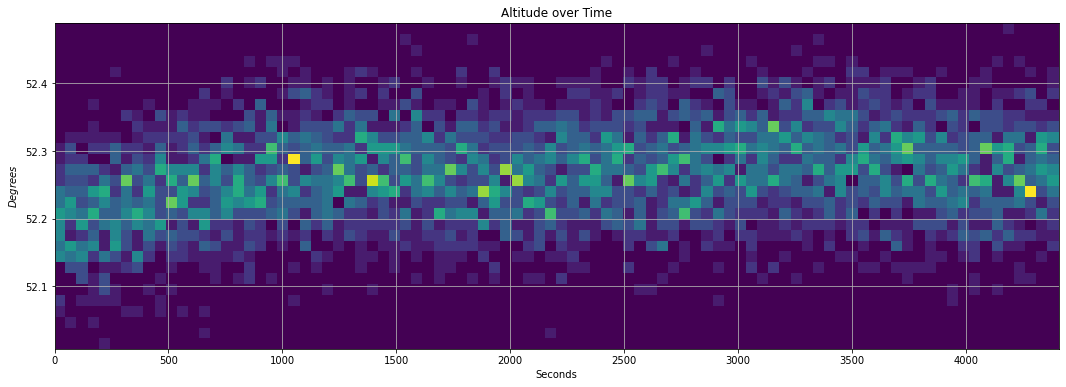

In [46]:
pitch = np.arctan2( data["ax"], data["ay"]) * 180 / np.pi;
fig, axs = plt.subplots(1, 1, figsize=(18, 6), tight_layout=False)
axs.hist2d(data_x, pitch, bins=[90,30]);
axs.set_title("Altitude over Time");
axs.grid(True);
axs.set(ylabel='$Degrees$', xlabel='Seconds');

# Accelerometer Filter Design

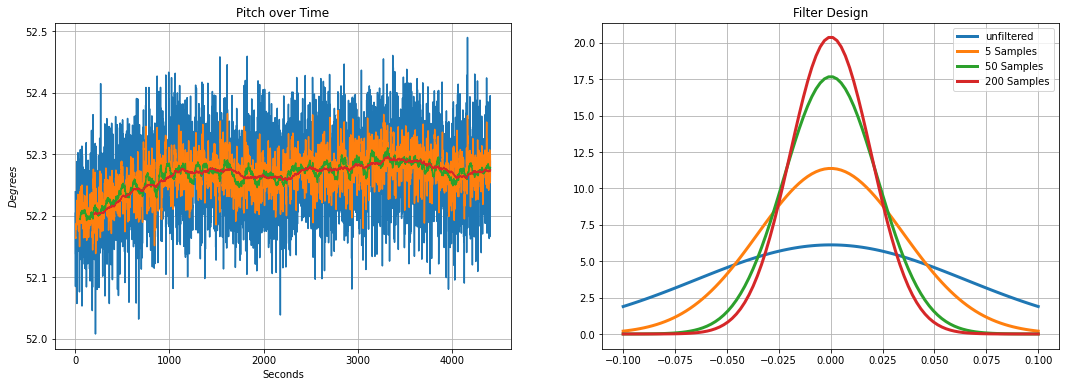

In [47]:
xlim = .1
x = np.linspace(-xlim, xlim, 100)

pitch = np.arctan2( data["ax"], data["ay"]) * 180 / np.pi;

num_avg = 5
data_ax_v1 = np.convolve(data["ax"], np.ones(num_avg), 'valid') / num_avg
data_ay_v1 = np.convolve(data["ay"], np.ones(num_avg), 'valid') / num_avg
pitch1 = np.arctan2( data_ax_v1, data_ay_v1) * 180 / np.pi;
data_x1 = data_x[num_avg-1:]

num_avg = 50
data_ax_v2 = np.convolve(data["ax"], np.ones(num_avg), 'valid') / num_avg
data_ay_v2 = np.convolve(data["ay"], np.ones(num_avg), 'valid') / num_avg
pitch2 = np.arctan2( data_ax_v2, data_ay_v2) * 180 / np.pi;
data_x2 = data_x[num_avg-1:]

num_avg = 200
data_ax_v3 = np.convolve(data["ax"], np.ones(num_avg), 'valid') / num_avg
data_ay_v3 = np.convolve(data["ay"], np.ones(num_avg), 'valid') / num_avg
pitch3 = np.arctan2( data_ax_v3, data_ay_v3) * 180 / np.pi;
data_x3 = data_x[num_avg-1:]


fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(18, 6), tight_layout=False)
axs1.set_title("Pitch over Time");
axs1.grid(True);
axs1.plot(data_x, pitch, label="original");
axs1.plot(data_x1, pitch1, label="5 samples");
axs1.plot(data_x2, pitch2, label="50 samples");
axs1.plot(data_x3, pitch3, label="200 samples");
axs1.set(ylabel='$Degrees$', xlabel='Seconds');

axs2.plot(x, stats.norm.pdf(x + np.mean(pitch), np.mean(pitch), np.std(pitch)), linewidth=3, linestyle='-', label="unfiltered");
axs2.plot(x, stats.norm.pdf(x + np.mean(pitch1), np.mean(pitch1), np.std(pitch1)), linewidth=3, linestyle='-', label="5 Samples");
axs2.plot(x, stats.norm.pdf(x + np.mean(pitch2), np.mean(pitch2), np.std(pitch2)), linewidth=3, linestyle='-', label="50 Samples");
axs2.plot(x, stats.norm.pdf(x + np.mean(pitch3), np.mean(pitch3), np.std(pitch3)), linewidth=3, linestyle='-', label="200 Samples");
axs2.grid(True);
axs2.set_title("Filter Design");
axs2.legend();

# Rotary Encoder

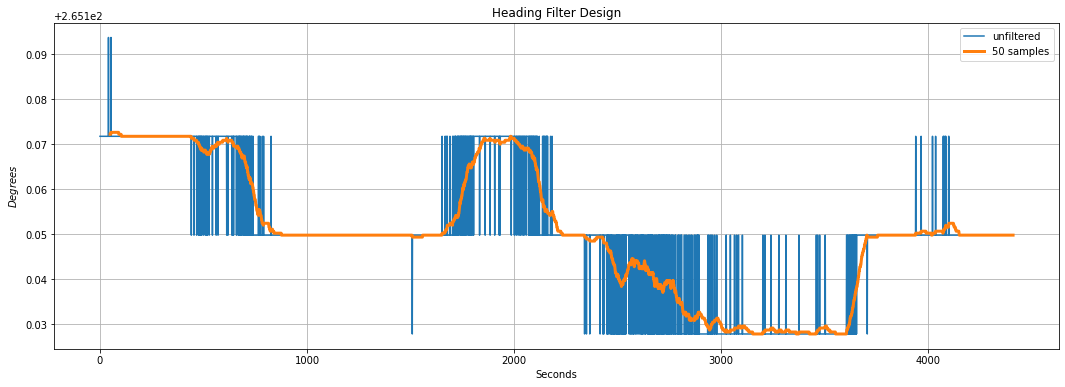

In [45]:
num_avg = 50

fig, axs = plt.subplots(1, 1, figsize=(18, 6), tight_layout=False)
axs.set_title("Heading Filter Design");
axs.grid(True);

axs.plot(data_x, data["heading"], label="unfiltered");
axs.plot(data_x[num_avg-1:], np.convolve(data["heading"], np.ones(num_avg), 'valid') / num_avg, linewidth=3, linestyle='-', label="50 samples");
axs.set(ylabel='$Degrees$', xlabel='Seconds');
axs.legend();